# Análisis predictivos de delitos en Colombia
## Integrantes: 
- Michael Andrés Taboada Naranjo
- Maria Camila García Salazar
- Diego Andrés Martínez Lora

In [32]:
#Importación de librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

### DESCRIPCION DE LOS DATOS
 
Este conjunto de datos contiene información sobre delitos informáticos ocurridos en Colombia, con un total de 207,231 registros. Los datos incluyen detalles sobre la ubicación, la fecha, el tipo de delito, y la cantidad involucrada. A continuación, describimos cada una de las columnas:

- **FECHA HECHO**: La fecha y hora en la que ocurrió el delito, en formato `MM/DD/YYYY 12:00:00 AM`. Esta columna permite identificar cuándo sucedió cada delito.
  
- **COD_DEPTO**: El código del departamento en Colombia donde ocurrió el delito. Es un valor numérico que permite identificar de manera única cada departamento.

- **DEPARTAMENTO**: El nombre del departamento de Colombia donde se cometió el delito (por ejemplo, BOGOTÁ D.C., ANTIOQUIA, HUILA). Esta columna ayuda a identificar la región geográfica del país donde suceden los delitos con mayor frecuencia.

- **COD_MUNI**: El código del municipio en Colombia donde se cometió el delito. Este es un valor numérico que identifica de forma única cada municipio.

- **MUNICIPIO**: El nombre del municipio donde ocurrió el delito (por ejemplo, BOGOTÁ D.C., NEIVA). Proporciona un nivel más detallado de ubicación, especificando el lugar exacto dentro del departamento.

- **DESCRIPCION CONDUCTA**: La descripción del delito cometido, basado en el código del artículo correspondiente del código penal colombiano (por ejemplo, "ARTÍCULO 269A. ACCESO ABUSIVO A UN SISTEMA INFORMÁTICO", "ARTÍCULO 269I. HURTO POR MEDIOS INFORMÁTICOS Y SIMILARES"). Esto proporciona información sobre la naturaleza y tipo del delito.

- **CANTIDAD**: La cantidad de delitos registrados en un evento específico, típicamente de valor 1. En algunos casos, puede haber múltiples delitos registrados en un solo incidente.


# Análisis exploratorio
En este apartado se realizó el correspondiente análisis exploratorio de los datos, para así verificar que no existiesen complicaciones y nuestros datos se encuentren organizados y limpios.

In [2]:
#Verificación de la carga correcta de los datos
data = pd.read_csv('DELITOS.csv')
data.head()

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,DESCRIPCION CONDUCTA,CANTIDAD
0,05/13/2006 12:00:00 AM,11,BOGOTA D.C.,11001,BOGOTA D.C.,ARTICULO 269I. HURTO POR MEDIOS INFORMATICOS Y...,1
1,10/06/2006 12:00:00 AM,11,BOGOTA D.C.,11001,BOGOTA D.C.,ARTICULO 269A. ACCESO ABUSIVO A UN SISTEMA INF...,1
2,05/24/2008 12:00:00 AM,11,BOGOTA D.C.,11001,BOGOTA D.C.,ARTICULO 269A. ACCESO ABUSIVO A UN SISTEMA INF...,1
3,01/01/2009 12:00:00 AM,41,HUILA,41001,NEIVA,ARTICULO 269F. VIOLACION DE DATOS PERSONALES,1
4,01/02/2009 12:00:00 AM,11,BOGOTA D.C.,11001,BOGOTA D.C.,ARTICULO 269A. ACCESO ABUSIVO A UN SISTEMA INF...,1


In [3]:
# Información de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207231 entries, 0 to 207230
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   FECHA HECHO           207231 non-null  object
 1   COD_DEPTO             207231 non-null  int64 
 2   DEPARTAMENTO          207231 non-null  object
 3   COD_MUNI              207231 non-null  int64 
 4   MUNICIPIO             207231 non-null  object
 5   DESCRIPCION CONDUCTA  207231 non-null  object
 6   CANTIDAD              207231 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 11.1+ MB


In [4]:
# Verificación de datos nulos
data.isna().sum()

FECHA HECHO             0
COD_DEPTO               0
DEPARTAMENTO            0
COD_MUNI                0
MUNICIPIO               0
DESCRIPCION CONDUCTA    0
CANTIDAD                0
dtype: int64

In [5]:
# Verificación de datos duplicados
data.duplicated().any()

False

In [6]:
# Nombres de columnas
data.columns

Index(['FECHA HECHO', 'COD_DEPTO', 'DEPARTAMENTO', 'COD_MUNI', 'MUNICIPIO',
       'DESCRIPCION CONDUCTA', 'CANTIDAD'],
      dtype='object')

In [7]:
# Conteo de valores únicos de la columna departamento
len(data['DEPARTAMENTO'].unique())

33

In [8]:
# Visualización de los valores únicos de la columna departamento
data['DEPARTAMENTO'].unique()

array(['BOGOTA D.C.', 'HUILA', 'ANTIOQUIA', 'SANTANDER', 'MAGDALENA',
       'ATLANTICO', 'NORTE DE SANTANDER', 'VALLE DEL CAUCA', 'META',
       'CALDAS', 'NARIÑO', 'RISARALDA', 'BOYACA', 'BOLIVAR', 'CESAR',
       'ARAUCA', 'PUTUMAYO', 'TOLIMA', 'CUNDINAMARCA', 'CAUCA',
       'LA GUAJIRA', 'VICHADA', 'SUCRE', 'QUINDIO', 'CAQUETA', 'AMAZONAS',
       'CASANARE', 'SAN ANDRES ISLAS', 'CORDOBA', 'CHOCO', 'GUAVIARE',
       'GUAINIA', 'VAUPES'], dtype=object)

C:\Users\Michael\AppData\Local\Temp\ipykernel_18224\1896698958.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['FECHA HECHO'] = pd.to_datetime(data['FECHA HECHO'], errors='coerce')


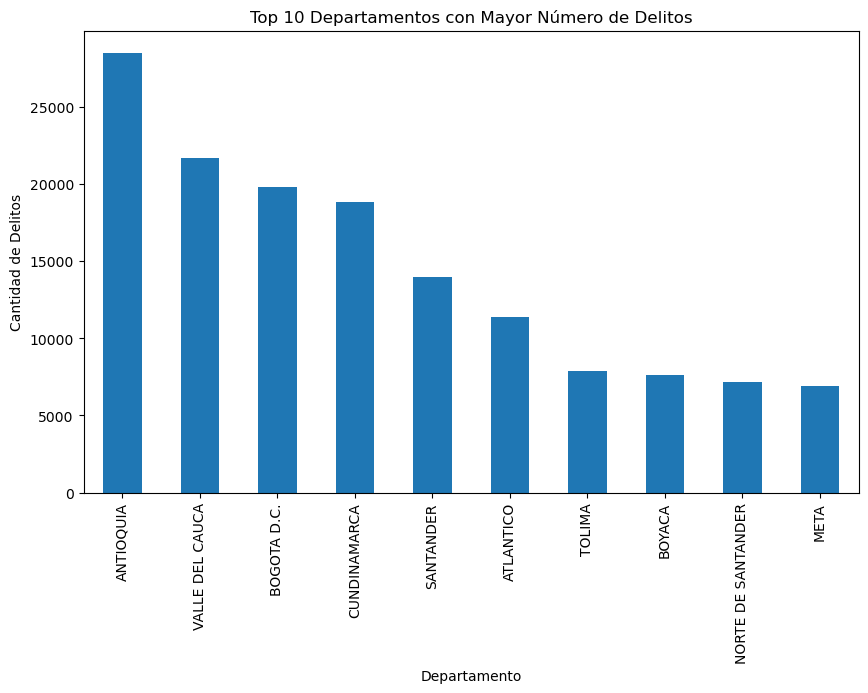

In [9]:
# 1. Departamentos donde se realizaron los delitos
delitos_por_departamento = data['DEPARTAMENTO'].value_counts()

# 2. Delitos por descripción de conducta
delitos_por_conducta = data['DESCRIPCION CONDUCTA'].value_counts()

# 3. Tendencia temporal de delitos
data['FECHA HECHO'] = pd.to_datetime(data['FECHA HECHO'], errors='coerce')  
delitos_por_año = data['FECHA HECHO'].dt.year.value_counts().sort_index()


# Gráfica - Cantidad de delitos por departamento
plt.figure(figsize=(10, 6))
delitos_por_departamento.head(10).plot(kind='bar')
plt.title('Top 10 Departamentos con Mayor Número de Delitos')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Delitos')
plt.show()


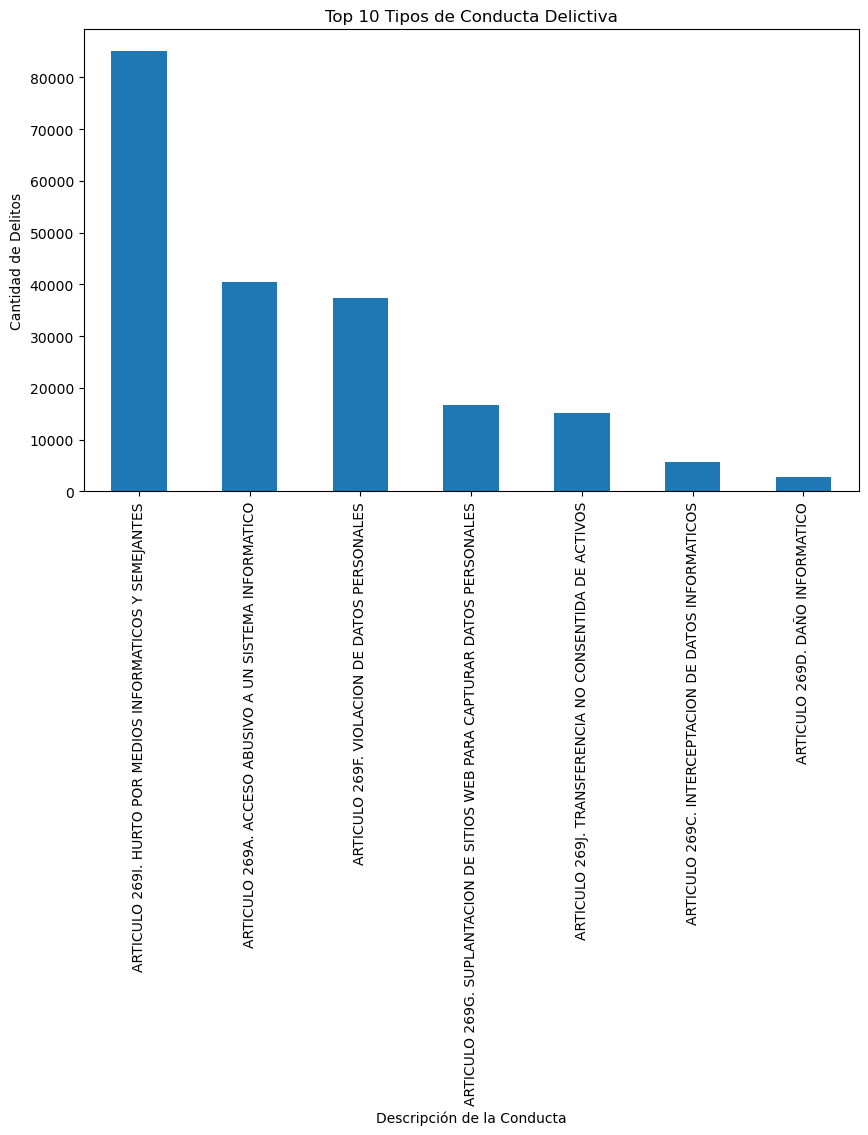

In [10]:
# Gráfica - Delitos por descripción de conducta
plt.figure(figsize=(10, 6))
delitos_por_conducta.head(7).plot(kind='bar')
plt.title('Top 10 Tipos de Conducta Delictiva')
plt.xlabel('Descripción de la Conducta')
plt.ylabel('Cantidad de Delitos')
plt.show()

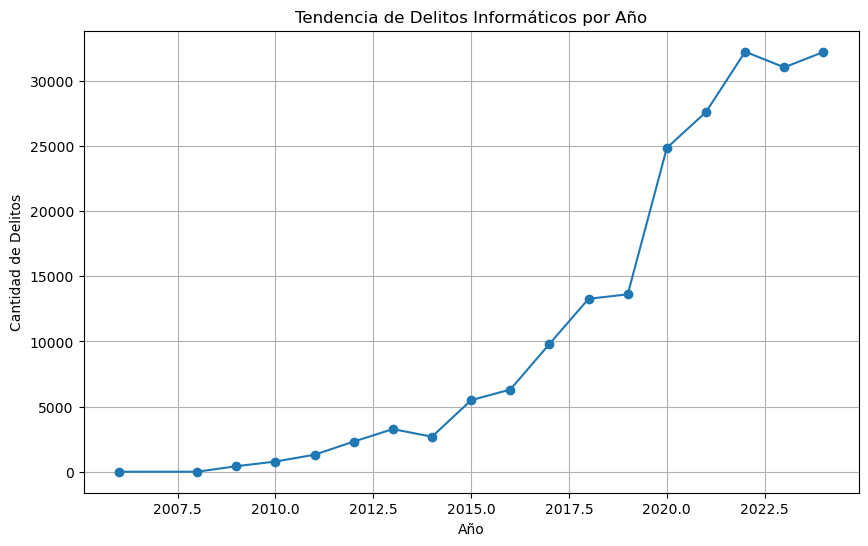

In [11]:
# Gráfica - Tendencia temporal de delitos
plt.figure(figsize=(10, 6))
delitos_por_año.plot(kind='line', marker='o')
plt.title('Tendencia de Delitos Informáticos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Delitos')
plt.grid(True)
plt.show()

In [56]:
# Preparación para visualización geoespacial de los datos
import folium
from IPython.display import display, IFrame

# Agrupar los delitos por departamento
delitos_por_departamento = data['DEPARTAMENTO'].value_counts().reset_index()
delitos_por_departamento.columns = ['DEPARTAMENTO', 'CANTIDAD']

# Cargar el shapefile de Colombia
shapefile_path = 'C:/Users/Michael/OneDrive - Universidad Tecnológica de Bolívar/Escritorio/Programacion/Data/COL_adm/COL_adm1.shp'
colombia_map = gpd.read_file(shapefile_path)


# Verificar las columnas del GeoDataFrame
print(colombia_map.columns)

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'TYPE_1', 'ENGTYPE_1',
       'NL_NAME_1', 'VARNAME_1', 'geometry'],
      dtype='object')


In [57]:
# Normalizar los nombres de los departamentos (en mayúsculas y sin tildes)
colombia_map['NAME_1'] = colombia_map['NAME_1'].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
delitos_por_departamento['DEPARTAMENTO'] = delitos_por_departamento['DEPARTAMENTO'].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Verificar los cambios realizados
print(colombia_map['NAME_1'].unique())

['AMAZONAS' 'ANTIOQUIA' 'ARAUCA' 'ATLANTICO' 'BOLIVAR' 'BOYACA' 'CORDOBA'
 'CALDAS' 'CAQUETA' 'CASANARE' 'CAUCA' 'CESAR' 'CHOCO' 'CUNDINAMARCA'
 'GUAINIA' 'GUAVIARE' 'HUILA' 'LA GUAJIRA' 'MAGDALENA' 'META' 'NARINO'
 'NORTE DE SANTANDER' 'PUTUMAYO' 'QUINDIO' 'RISARALDA'
 'SAN ANDRES Y PROVIDENCIA' 'SANTANDER' 'SUCRE' 'TOLIMA' 'VALLE DEL CAUCA'
 'VAUPES' 'VICHADA']


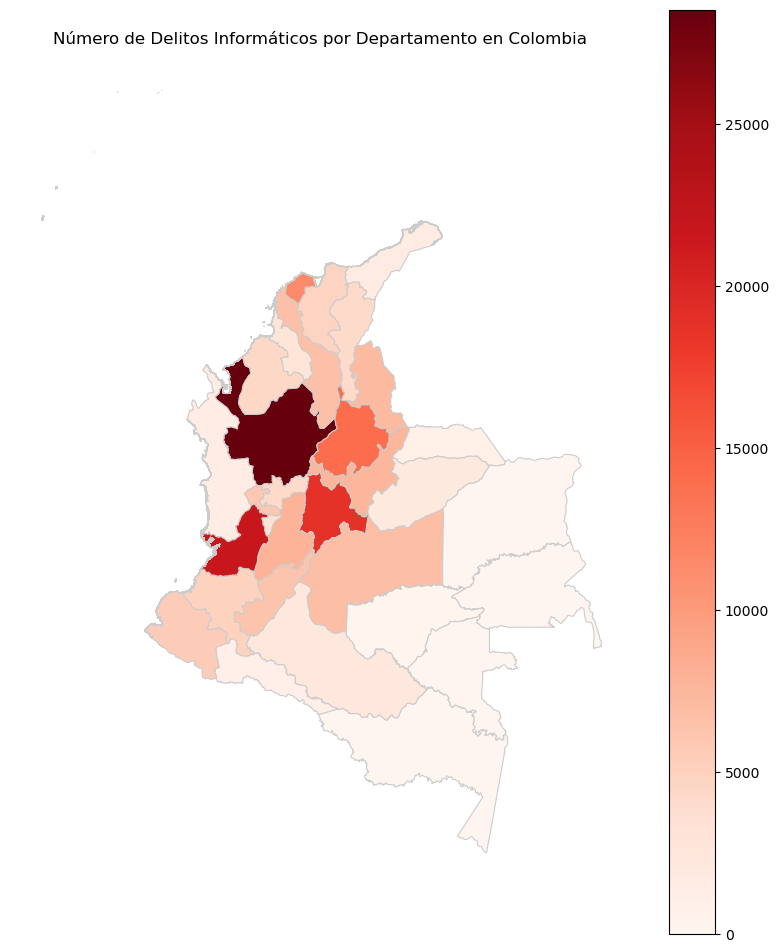

In [58]:
# Unir los datos de delitos con el archivo shapefile
# Usamos la columna 'NAME_1' que contiene los nombres de los departamentos
map_data = colombia_map.merge(delitos_por_departamento, left_on='NAME_1', right_on='DEPARTAMENTO', how='left')

# Llenar los valores faltantes con 0 (para departamentos sin datos de delitos)
map_data['CANTIDAD'] = map_data['CANTIDAD'].fillna(0)

# Crear el mapa con los delitos por departamento
fig, ax = plt.subplots(figsize=(10, 12))
map_data.plot(column='CANTIDAD', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Número de Delitos Informáticos por Departamento en Colombia')
plt.axis('off')

# Mostrar el mapa
plt.show()

In [59]:
# Unir los datos de delitos con el archivo shapefile
map_data = colombia_map.merge(delitos_por_departamento, left_on='NAME_1', right_on='DEPARTAMENTO', how='left')

# Llenar los valores faltantes con 0 (para departamentos sin datos de delitos)
map_data['CANTIDAD'] = map_data['CANTIDAD'].fillna(0)

# Crear un mapa base sin fondo
m = folium.Map(
    location=[4.5709, -74.2973], 
    zoom_start=6, 
    tiles=None,  # Elimina la capa de fondo de OpenStreetMap
    max_bounds=True
)

# Añadir la capa de coropletas con la información de los delitos
folium.Choropleth(
    geo_data=map_data,
    name='choropleth',
    data=map_data,
    columns=['NAME_1', 'CANTIDAD'],
    key_on='feature.properties.NAME_1',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Número de Delitos Informáticos por Departamento'
).add_to(m)

# Añadir información emergente para cada departamento
folium.GeoJson(
    map_data,
    name="Delitos por Departamento",
    tooltip=folium.GeoJsonTooltip(fields=['NAME_1', 'CANTIDAD'], aliases=['Departamento:', 'Cantidad de Delitos:'])
).add_to(m)

# Añadir control de capas
folium.LayerControl().add_to(m)

# Guardar el mapa en un archivo temporal HTML
map_file = 'mapa_delitos_colombia.html'
m.save(map_file)

# Mostrar el mapa directamente en el notebook
display(IFrame(map_file, width=800, height=600))

# Implementación de modelo predictivo

20:13:46 - cmdstanpy - INFO - Chain [1] start processing
20:13:46 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Michael\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


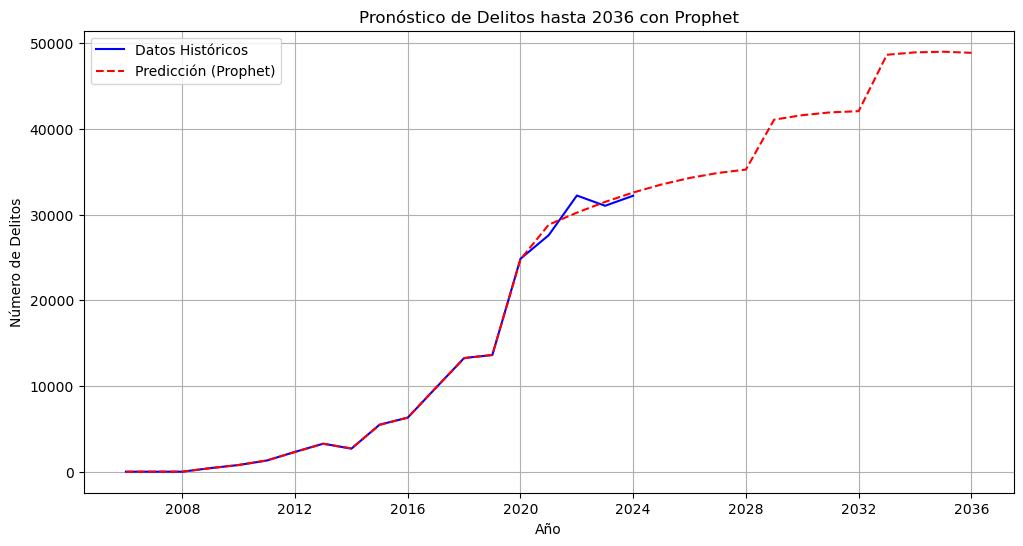

In [25]:
from prophet import Prophet

# Preparar los datos para Prophet
yearly_data_prophet = delitos_por_año.reset_index().rename(columns={'index': 'ds', 'FECHA HECHO': 'y'})
yearly_data_prophet.columns = ['ds', 'y']  # Asegurarse de que los nombres de las columnas sean correctos
yearly_data_prophet['ds'] = pd.to_datetime(yearly_data_prophet['ds'], format='%Y')

# Inicializar y ajustar el modelo Prophet con configuraciones adicionales
modelo_prophet = Prophet(
    yearly_seasonality=True,  # Habilitar la estacionalidad anual
    changepoint_prior_scale=1.0,  # Aumentar la flexibilidad de los puntos de cambio (anteriormente 0.5)
    seasonality_mode='multiplicative'  # Usar un modelo multiplicativo para la estacionalidad
)
modelo_prophet.add_seasonality(name='anual', period=365.25, fourier_order=15)  # Aumentar el orden de Fourier para capturar más patrones
modelo_prophet.fit(yearly_data_prophet)

# Crear un DataFrame futuro para hacer predicciones hasta el año 2036
años_futuros = modelo_prophet.make_future_dataframe(periods=2036 - yearly_data_prophet['ds'].dt.year.max(), freq='Y')

# Realizar la predicción con Prophet
prediccion = modelo_prophet.predict(años_futuros)

# Graficar los datos históricos y la predicción juntos
plt.figure(figsize=(12, 6))
plt.plot(yearly_data_prophet['ds'], yearly_data_prophet['y'], label='Datos Históricos', color='blue')
plt.plot(prediccion['ds'], prediccion['yhat'], label='Predicción (Prophet)', color='red', linestyle='--')
plt.xlabel('Año')
plt.ylabel('Número de Delitos')
plt.title('Pronóstico de Delitos hasta 2036 con Prophet con Mayor Flexibilidad')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Comparar las predicciones del modelo con los datos reales solo para los años históricos
historical_forecast = prediccion[prediccion['ds'] <= yearly_data_prophet['ds'].max()]

# Obtener los valores reales y predichos
y_true = yearly_data_prophet['y'].values
y_pred = historical_forecast['yhat'].values

# Calcular MAE (Mean Absolute Error)
mae = mean_absolute_error(y_true, y_pred)

# Calcular RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Mostrar las métricas
print(f'MAE (Error Absoluto Medio): {mae}')
print(f'RMSE (Raíz del Error Cuadrático Medio): {rmse}')


MAE (Error Absoluto Medio): 239.35224119601116
RMSE (Raíz del Error Cuadrático Medio): 570.1922079179719


Por otra parte, el F1-score y la precisión no se aplican directamente a los modelos de series temporales, ya que estas métricas se utilizan para clasificación y no para regresión.